GRUPO:
HENNY ROCIO CARRILLO - hcarril42467@universidadean.edu.co
WILBER ALEXANDER RODRIGUEZ CASTRO - wrodrig96546@universidadean.edu.co

TEMA: Tarea de modelos de conteo [CountVectorizer] [TfidfVectorizer]


In [2]:
import re ## Exprexiones regulares
import nltk ## Procesamiento de lenguaje natural
from nltk.corpus import stopwords ## Palabras vacias
from nltk.stem import SnowballStemmer ## Stemming
from nltk.tokenize import word_tokenize ## Tokenizacion
from nltk.tokenize import RegexpTokenizer ## Tokenizacion
from sklearn.feature_extraction.text import CountVectorizer ## Vectorizador
import spacy ## Procesamiento de lenguaje natural
import pandas as pd


############## Descarga de recursos de nltk ################
nltk.download('punkt') ## Tokenizador
nltk.download('stopwords') ## Palabras vacias
nltk.download('snowball_data') ## Stemming
nltk.download('wordnet') ## Lematizacion

############## Es necesario descargar estos recursos para poder ejecutar el script ################


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\analistaderiesgo1\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\analistaderiesgo1\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\analistaderiesgo1\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\analistaderiesgo1\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# URL del archivo crudo desde GitHub
url = 'https://raw.githubusercontent.com/Izainea/nlp_ean/main/Datos/Datos%20Crudos/reviews_booking.csv'

# Cargar el archivo CSV en un DataFrame
Baseinicial_DF = pd.read_csv(url)

# Mostrar el DataFrame
Baseinicial_DF.head()

C:\Users\analistaderiesgo1\AppData\Local\Temp\ipykernel_11072\1439072273.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Baseinicial_DF = pd.read_csv(url)


,Unnamed: 0,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10,Fue la Mejor Opción que pudimos haber tomado e...,NaN,Sí
1,1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10,"Ubicación, comodidades y limpieza",NaN,Sí
2,2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10,"El lugar esta muy bien ubicado, el apartamento...",NaN,Sí
3,3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10,Todo estuvo perfecto. La ubicación y la relaci...,NaN,Sí
4,4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10,"Es muy cómodo y acogedor, la atención es excel...",NaN,Sí


In [4]:
# Eliminar filas con valores NaN en la columna 'Calificación'
Baseinicial_DF = Baseinicial_DF.dropna(subset=['Calificación'])

# Verificar si la columna 'Calificación' ahora está limpia
print(Baseinicial_DF['Calificación'].isnull().sum())

# Crear una nueva columna para segmentar las calificaciones
def segmentar_calificacion(calificación):
    try:
        calificación = float(calificación)  # Convertir a número (float o int)
        if 0 <= calificación <= 7:
            return "Negativas"
        elif 8 <= calificación <= 10:
            return "Positivas"
        else:
            return "Desconocido"
    except ValueError:
        return "Desconocido"

# Aplicar la segmentación
Baseinicial_DF['Segmento_Calificación'] = Baseinicial_DF['Calificación'].apply(segmentar_calificacion)

# Mostrar el DataFrame con la nueva columna
print(Baseinicial_DF.head())

0
   Unnamed: 0       País Acomodación    Noches  Fecha hospedaje  \
0           0  Venezuela         NaN  2 noches    julio de 2023   
1           1   Colombia         NaN  4 noches  octubre de 2024   
2           2   Colombia         NaN   1 noche  octubre de 2024   
3           3   Colombia         NaN   1 noche   agosto de 2024   
4           4   Colombia         NaN  3 noches    marzo de 2024   

              Grupo viaje           Fecha reseña  \
0               En pareja    31 de julio de 2023   
1  Persona que viaja sola  23 de octubre de 2024   
2  Persona que viaja sola  15 de octubre de 2024   
3               En pareja   20 de agosto de 2024   
4               En pareja    27 de marzo de 2024   

                                    Titulo Calificación  \
0                              Excepcional           10   
1                               Fantástica           10   
2                              Excepcional           10   
3  Gran apartamento en una gran ubicación.    

In [5]:
Baseinicial_DF['Calificación']=Baseinicial_DF['Calificación'].str.replace(',','.').astype(float)

In [6]:
pip install langdetect


In [7]:
from langdetect import detect
import pandas as pd

# Función para detectar el idioma de un texto
def detectar_idioma(texto):
    try:
        # Detectar el idioma
        idioma = detect(texto)
        # Retornar 'Español' si el idioma es español, y 'Otro' si no lo es
        return 'Español' if idioma == 'es' else 'Otro'
    except:
        return 'Otro'  # En caso de error, retornamos 'Otro'

# Filtrar por calificaciones menores o iguales a 7
Baseinicial_DFN = Baseinicial_DF[Baseinicial_DF['Calificación'] <= 7]

# Seleccionar solo las columnas 'Cosas Negativas' y 'Calificación' para mantener contexto
Baseinicial_DFN = Baseinicial_DFN[['Cosas Negativas', 'Calificación']] 

# Filtrar textos con longitud mayor a 60 caracteres y manejar valores nulos
Baseinicial_DFN = Baseinicial_DFN[Baseinicial_DFN['Cosas Negativas'].fillna('').apply(len) > 60]

# Filtrar solo los textos que están en español usando la función detectar_idioma
Baseinicial_DFN['Idioma'] = Baseinicial_DFN['Cosas Negativas'].apply(detectar_idioma)

# Verificar si hay textos en otros idiomas y excluirlos
Baseinicial_DFN = Baseinicial_DFN[Baseinicial_DFN['Idioma'] == 'Español']

# Tomar una muestra aleatoria de 7500 registros
Baseinicial_DFN = Baseinicial_DFN.sample(7500, random_state=42)  # Añadir un random_state para reproducibilidad

# Añadir la columna 'Segmento_Calificación' con el valor 'Negativa'
Baseinicial_DFN['Segmento_Calificación'] = 'Negativa'

# Mostrar las primeras filas para verificar el resultado
print(Baseinicial_DFN.head())




                                          Cosas Negativas  Calificación  \
205937  Somos Keto no consumimos carbohidratos: ni fru...           4.0   
420497  Mucho ruido, claramente se escuchaba todo, has...           5.0   
175673  El tamaño general de la habitación, creemos qu...           7.0   
427973  Creo que no conté con suerte ese día por todo ...           6.0   
353577  Las sábanas estaba sucias, habían restos de co...           5.0   

         Idioma Segmento_Calificación  
205937  Español              Negativa  
420497  Español              Negativa  
175673  Español              Negativa  
427973  Español              Negativa  
353577  Español              Negativa  


In [8]:
Baseinicial_DFN

,Cosas Negativas,Calificación,Idioma,Segmento_Calificación
205937,Somos Keto no consumimos carbohidratos: ni fru...,4.0,Español,Negativa
420497,"Mucho ruido, claramente se escuchaba todo, has...",5.0,Español,Negativa
175673,"El tamaño general de la habitación, creemos qu...",7.0,Español,Negativa
427973,Creo que no conté con suerte ese día por todo ...,6.0,Español,Negativa
353577,"Las sábanas estaba sucias, habían restos de co...",5.0,Español,Negativa
...,...,...,...,...
323988,Me tocó la habitación en el 5to piso y no hay ...,7.0,Español,Negativa
72607,Que solo se hacen pagos en efectivo y según la...,3.0,Español,Negativa
355994,"Desafortunadamente el ruido, muchas personas e...",7.0,Español,Negativa
128361,"El room service es carísimo, teníamos incluido...",2.0,Español,Negativa


In [9]:
from langdetect import detect

# Función para detectar el idioma de un texto
def detectar_idioma(texto):
    try:
        # Detectar el idioma
        idioma = detect(texto)
        # Retornar 'Español' si el idioma es español, y 'Otro' si no lo es
        return 'Español' if idioma == 'es' else 'Otro'
    except Exception as e:
        print(f"Error detectando idioma: {e}")  # Mostrar el error si se produce
        return 'Otro'  # En caso de error, retornamos 'Otro'

# Filtrar por calificaciones entre 8 y 10
Baseinicial_DFP = Baseinicial_DF[(Baseinicial_DF['Calificación'] >= 8) & (Baseinicial_DF['Calificación'] <= 10)]

# Seleccionar solo la columna 'Cosas Positivas' y 'Calificación' para mantener contexto
Baseinicial_DFP = Baseinicial_DFP[['Cosas Positivas', 'Calificación']] 

# Filtrar textos con longitud mayor a 60 caracteres y manejar valores nulos
Baseinicial_DFP = Baseinicial_DFP[Baseinicial_DFP['Cosas Positivas'].fillna('').apply(len) > 60]

# Filtrar solo los textos que están en español utilizando la función detectar_idioma
Baseinicial_DFP['Idioma'] = Baseinicial_DFP['Cosas Positivas'].apply(detectar_idioma)

# Verificar si se han detectado correctamente los textos en español
Baseinicial_DFP = Baseinicial_DFP[Baseinicial_DFP['Idioma'] == 'Español']

# Tomar una muestra aleatoria de 7500 registros
Baseinicial_DFP = Baseinicial_DFP.sample(7500, random_state=42)  # Añadir un random_state para reproducibilidad

# Añadir la columna 'Segmento_Calificación' con el valor 'Positiva'
Baseinicial_DFP['Segmento_Calificación'] = 'Positiva'

# Mostrar las primeras filas para verificar el resultado
print(Baseinicial_DFP.head())

                                          Cosas Positivas  Calificación  \
416623  Todo excelente, buena ubicación, el personal s...          10.0   
114734  Excelente ubicación, personal amable, atento y...           9.0   
407010  Excelente comida y trato del personal, buena v...          10.0   
358317  Las instalaciones son acordes a las fotos y el...          10.0   
76933   Instalaciones actas para personas con movilida...          10.0   

         Idioma Segmento_Calificación  
416623  Español              Positiva  
114734  Español              Positiva  
407010  Español              Positiva  
358317  Español              Positiva  
76933   Español              Positiva  


In [10]:
Baseinicial_DFP

,Cosas Positivas,Calificación,Idioma,Segmento_Calificación
416623,"Todo excelente, buena ubicación, el personal s...",10.0,Español,Positiva
114734,"Excelente ubicación, personal amable, atento y...",9.0,Español,Positiva
407010,"Excelente comida y trato del personal, buena v...",10.0,Español,Positiva
358317,Las instalaciones son acordes a las fotos y el...,10.0,Español,Positiva
76933,Instalaciones actas para personas con movilida...,10.0,Español,Positiva
...,...,...,...,...
282376,Todo es muy cómodo. Buenas habitaciones servic...,10.0,Español,Positiva
291538,"Cumple con lo que uno paga, me hospedé en dos ...",9.0,Español,Positiva
242378,La amabilidad de la propietaria.\nPersonas muy...,8.0,Español,Positiva
317187,"La ubicación, los servicios del hotel, el pers...",10.0,Español,Positiva


In [11]:
# Renombrar las columnas para unificarlas bajo 'Comentarios'
Baseinicial_DFP.rename(columns={'Cosas Positivas': 'Comentarios'}, inplace=True)
Baseinicial_DFN.rename(columns={'Cosas Negativas': 'Comentarios'}, inplace=True)


In [12]:
# Añadir una columna para identificar si el comentario es positivo o negativo
Baseinicial_DFP['Segmento_Calificación'] = 'Positiva'
Baseinicial_DFN['Segmento_Calificación'] = 'Negativa'


In [13]:
# Añadir una columna 'Segmento_Calificación' para identificar los comentarios positivos y negativos
Baseinicial_DFP['Segmento_Calificación'] = 'Positiva'
Baseinicial_DFN['Segmento_Calificación'] = 'Negativa'

In [14]:
# Concatenar ambos DataFrames
Baseinicial_Consolidada = pd.concat([Baseinicial_DFP, Baseinicial_DFN], ignore_index=True)

In [15]:
# Verificar el resultado
print(Baseinicial_Consolidada.head())
print(f"Total de registros consolidados: {Baseinicial_Consolidada.shape[0]}")


                                         Comentarios  Calificación   Idioma  \
0  Todo excelente, buena ubicación, el personal s...          10.0  Español   
1  Excelente ubicación, personal amable, atento y...           9.0  Español   
2  Excelente comida y trato del personal, buena v...          10.0  Español   
3  Las instalaciones son acordes a las fotos y el...          10.0  Español   
4  Instalaciones actas para personas con movilida...          10.0  Español   

  Segmento_Calificación  
0              Positiva  
1              Positiva  
2              Positiva  
3              Positiva  
4              Positiva  
Total de registros consolidados: 15000


In [16]:
Baseinicial_Consolidada

,Comentarios,Calificación,Idioma,Segmento_Calificación
0,"Todo excelente, buena ubicación, el personal s...",10.0,Español,Positiva
1,"Excelente ubicación, personal amable, atento y...",9.0,Español,Positiva
2,"Excelente comida y trato del personal, buena v...",10.0,Español,Positiva
3,Las instalaciones son acordes a las fotos y el...,10.0,Español,Positiva
4,Instalaciones actas para personas con movilida...,10.0,Español,Positiva
...,...,...,...,...
14995,Me tocó la habitación en el 5to piso y no hay ...,7.0,Español,Negativa
14996,Que solo se hacen pagos en efectivo y según la...,3.0,Español,Negativa
14997,"Desafortunadamente el ruido, muchas personas e...",7.0,Español,Negativa
14998,"El room service es carísimo, teníamos incluido...",2.0,Español,Negativa


In [17]:
# Descarga necesaria para el tokenizador (corrección del nombre)
nltk.download('punkt')  

# Tokenización por palabras en la columna 'Baseinicial_Consolidado'
Baseinicial_Consolidada['Tokenizado'] = Baseinicial_Consolidada['Comentarios'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\analistaderiesgo1\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!


In [18]:

Baseinicial_Consolidada.head()

,Comentarios,Calificación,Idioma,Segmento_Calificación,Tokenizado
0,"Todo excelente, buena ubicación, el personal s...",10.0,Español,Positiva,"[Todo, excelente, ,, buena, ubicación, ,, el, ..."
1,"Excelente ubicación, personal amable, atento y...",9.0,Español,Positiva,"[Excelente, ubicación, ,, personal, amable, ,,..."
2,"Excelente comida y trato del personal, buena v...",10.0,Español,Positiva,"[Excelente, comida, y, trato, del, personal, ,..."
3,Las instalaciones son acordes a las fotos y el...,10.0,Español,Positiva,"[Las, instalaciones, son, acordes, a, las, fot..."
4,Instalaciones actas para personas con movilida...,10.0,Español,Positiva,"[Instalaciones, actas, para, personas, con, mo..."


In [19]:
print(Baseinicial_Consolidada.columns)


Index(['Comentarios', 'Calificación', 'Idioma', 'Segmento_Calificación',
       'Tokenizado'],
      dtype='object')


In [20]:
def clean_text(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Convertir lista de tokens a una cadena
    # Normalización
    text = text.lower()
    # Limpieza con regex
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenización
    tokens = word_tokenize(text)
    # Stop words
    stopwords_esp = stopwords.words('spanish')
    tokens = [token for token in tokens if token not in stopwords_esp]
    # Lemmatización
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(' '.join(tokens))
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)




In [21]:
from sklearn.model_selection import train_test_split


In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS  # Corrige la importación
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import string

# Función de limpieza de texto simple
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    # Eliminar palabras vacías (stopwords)
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Verificar las columnas del DataFrame
print(Baseinicial_Consolidada.columns)

# Asegurarse de que la columna 'Segmento_Calificación' esté presente
if 'Segmento_Calificación' in Baseinicial_Consolidada.columns:
    # Aplicar la limpieza de texto
    Baseinicial_Consolidada['Comentario_Limpio'] = Baseinicial_Consolidada['Comentarios'].apply(clean_text)

    # Vectorización de los comentarios limpios
    count_vectorizer = CountVectorizer()
    X = count_vectorizer.fit_transform(Baseinicial_Consolidada['Comentario_Limpio'])

    # Etiquetas de sentimiento (Positivo vs. No positivo)
    y = Baseinicial_Consolidada['Segmento_Calificación'] == 'Positivo'

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Clasificación utilizando RandomForest
    random_forest_classifier = RandomForestClassifier()
    random_forest_classifier.fit(X_train, y_train)

    # Predicciones
    y_pred = random_forest_classifier.predict(X_test)

    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
else:
    print("La columna 'Segmento_Calificación' no se encuentra en el DataFrame.")



Index(['Comentarios', 'Calificación', 'Idioma', 'Segmento_Calificación',
       'Tokenizado'],
      dtype='object')
Accuracy: 1.0000


In [24]:
# Crear el vectorizador con n-gramas de 2 palabras
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = TfidfVectorizer(ngram_range=(2, 2))

# Aplicar el vectorizador a las observaciones
vectores = count_vectorizer.fit_transform(Baseinicial_Consolidada['Comentarios'])

# Mostrar las primeras características del vectorizador (opcional)
print(count_vectorizer.get_feature_names_out()[:10])  # Muestra las primeras 10 características



['00 00' '00 00am' '00 a1' '00 además' '00 al' '00 am' '00 aprox'
 '00 cierra' '00 cuando' '00 de']


In [25]:
DF_count = pd.DataFrame.sparse.from_spmatrix(vectores, columns=count_vectorizer.get_feature_names_out())


In [26]:
# Mostrar los 30 n-gramas más frecuentes
top_30_ngrams = DF_count.sum(axis=0).sort_values(ascending=False).head(30)


In [27]:
print(top_30_ngrams)

la habitación        225.780986
de la                204.723907
el desayuno          196.832577
el personal          179.946692
la ubicación         159.664142
la atención          148.197121
en la                144.453203
es muy               140.209258
del personal         136.381087
las habitaciones     135.841139
en el                129.891196
muy amable           111.652271
personal muy         111.267528
muy buena            108.991963
el hotel             108.536646
las instalaciones    104.569172
de las                96.099209
del hotel             90.246609
atención del          85.317739
el servicio           82.898397
la cama               82.881441
lo que                82.417851
que no                75.804436
el baño               74.855864
muy bien              73.305133
la limpieza           67.589826
todo el               65.966319
ubicación es          65.381456
servicio de           64.838301
de los                 63.29012
dtype: Sparse[float64, 0]


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import string

# Función de limpieza de texto simple
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    # Eliminar palabras de longitud 1, 2, para evitar eliminar palabras útiles
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Evitar eliminar palabras útiles
    return text

# Verifica si hay valores nulos o vacíos en la columna 'Observaciones'
if Baseinicial_Consolidada['Comentarios'].isnull().sum() > 0:
    print("Hay valores nulos en 'Observaciones', se eliminarán o reemplazarán.")
    Baseinicial_Consolidada['Comentarios'].fillna('', inplace=True)  # Rellenar los nulos

# Inspeccionar las primeras filas para asegurarnos de que 'Observaciones' tiene datos
print("Primeras observaciones originales:")
print(Baseinicial_Consolidada['Comentarios'].head())

# Aplicar la función de limpieza a la columna de texto
Baseinicial_Consolidada['Observaciones_Limpias'] = Baseinicial_Consolidada['Comentarios'].apply(clean_text)

# Verificar las primeras observaciones después de la limpieza
print("Primeras observaciones después de la limpieza:")
print(Baseinicial_Consolidada[['Comentarios', 'Observaciones_Limpias']].head())

# Verificar la longitud de las observaciones limpias para asegurarnos de que no sean demasiado cortas
Baseinicial_Consolidada['Longitud_Observaciones_Limpias'] = Baseinicial_Consolidada['Observaciones_Limpias'].apply(lambda x: len(x.split()))
print("Longitud de las observaciones después de la limpieza:")
print(Baseinicial_Consolidada[['Observaciones_Limpias', 'Longitud_Observaciones_Limpias']].head())

# Ver si alguna observación tiene longitud 0 después de la limpieza
if (Baseinicial_Consolidada['Longitud_Observaciones_Limpias'] == 0).sum() > 0:
    print("Existen observaciones limpias vacías, revisa la limpieza.")
    print(Baseinicial_Consolidada[Baseinicial_Consolidada['Longitud_Observaciones_Limpias'] == 0])

# Ahora, aplicamos el CountVectorizer con ajustes más flexibles
vectorizador_Base_Consolidada = CountVectorizer(stop_words=None, max_features=1000)  # Limitar el número de características a 1000

# Ajustar el vectorizador a los textos limpios
vectorizador_Base_Consolidada.fit(Baseinicial_Consolidada['Observaciones_Limpias'])

# Ver qué características (palabras) ha extraído el vectorizador
print("Características extraídas por CountVectorizer:")
print(vectorizador_Base_Consolidada.get_feature_names_out()[:20])  # Mostrar solo las primeras 20

# Transformar el texto en una matriz de características
salida = vectorizador_Base_Consolidada.transform(Baseinicial_Consolidada['Observaciones_Limpias'])

# Convertir la salida a un DataFrame para verlo de forma más clara
df_salidas = pd.DataFrame(salida.toarray(), columns=vectorizador_Base_Consolidada.get_feature_names_out())

# Mostrar las primeras filas de la salida
print("Matriz de características transformadas:")
print(df_salidas.head())  # Ver las primeras filas de la salida

# Verificar si todas las columnas tienen ceros
if df_salidas.sum().sum() == 0:
    print("La matriz de características tiene solo ceros, revisa la limpieza o el vectorizador.")


Primeras observaciones originales:
0    Todo excelente, buena ubicación, el personal s...
1    Excelente ubicación, personal amable, atento y...
2    Excelente comida y trato del personal, buena v...
3    Las instalaciones son acordes a las fotos y el...
4    Instalaciones actas para personas con movilida...
Name: Comentarios, dtype: object
Primeras observaciones después de la limpieza:
                                         Comentarios  \
0  Todo excelente, buena ubicación, el personal s...   
1  Excelente ubicación, personal amable, atento y...   
2  Excelente comida y trato del personal, buena v...   
3  Las instalaciones son acordes a las fotos y el...   
4  Instalaciones actas para personas con movilida...   

                               Observaciones_Limpias  
0  todo excelente buena ubicación personal súper ...  
1  excelente ubicación personal amable atento tod...  
2  excelente comida trato del personal buena vist...  
3  las instalaciones son acordes las fotos espaci... 

Resultados de PCA (primeras filas):
   Componente_1  Componente_2
0     -1.253900     -0.234199
1     -1.280383      0.546224
2      0.208466     -0.448497
3     -0.702046     -0.642452
4     -0.523980     -0.526497


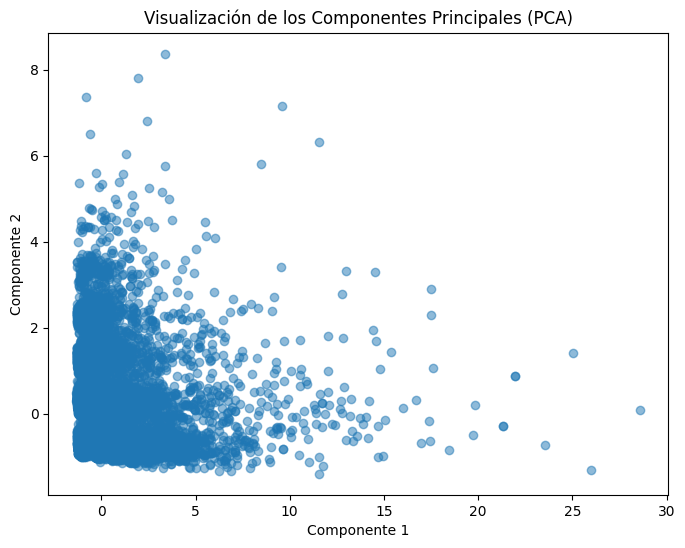

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import string

# Función de limpieza de texto simple
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    # Eliminar palabras de longitud 1, 2, para evitar eliminar palabras útiles
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Evitar eliminar palabras útiles
    return text

# Verifica si hay valores nulos o vacíos en la columna 'Observaciones'
if Baseinicial_Consolidada['Comentarios'].isnull().sum() > 0:
    print("Hay valores nulos en 'Observaciones', se eliminarán o reemplazarán.")
    Baseinicial_Consolidada['Comentarios'].fillna('', inplace=True)  # Rellenar los nulos

# Aplicar la función de limpieza a la columna de texto
Baseinicial_Consolidada['Observaciones_Limpias'] = Baseinicial_Consolidada['Comentarios'].apply(clean_text)

# Aplicar el CountVectorizer para extraer las características de texto
vectorizador_Base_Consolidada = CountVectorizer(stop_words=None, max_features=1000)  # Limitar el número de características a 1000

# Ajustar el vectorizador a los textos limpios
vectorizador_Base_Consolidada.fit(Baseinicial_Consolidada['Observaciones_Limpias'])

# Transformar el texto en una matriz de características
salida = vectorizador_Base_Consolidada.transform(Baseinicial_Consolidada['Observaciones_Limpias'])

# Convertir la salida a un DataFrame para verlo de forma más clara
df_salidas = pd.DataFrame(salida.toarray(), columns=vectorizador_Base_Consolidada.get_feature_names_out())

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
pca_resultado = pca.fit_transform(df_salidas)

# Convertir el resultado de PCA en un DataFrame para una mejor visualización
df_pca = pd.DataFrame(pca_resultado, columns=['Componente_1', 'Componente_2'])

# Mostrar los resultados de PCA
print("Resultados de PCA (primeras filas):")
print(df_pca.head())

# Opcional: Visualizar los componentes principales en un gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Componente_1'], df_pca['Componente_2'], alpha=0.5)
plt.title("Visualización de los Componentes Principales (PCA)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import string

# Función de limpieza de texto simple
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    # Eliminar palabras de longitud 1, 2, para evitar eliminar palabras útiles
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Evitar eliminar palabras útiles
    return text

# Verifica si hay valores nulos o vacíos en la columna 'Observaciones'
if Baseinicial_Consolidada['Comentarios'].isnull().sum() > 0:
    print("Hay valores nulos en 'Comentarios', se eliminarán o reemplazarán.")
    Baseinicial_Consolidada['Comentarios'].fillna('', inplace=True)  # Rellenar los nulos

# Aplicar la función de limpieza a la columna de texto
Baseinicial_Consolidada['Observaciones_Limpias'] = Baseinicial_Consolidada['Comentarios'].apply(clean_text)

# Aplicar el CountVectorizer para extraer las características de texto
vectorizador = CountVectorizer(stop_words=None, max_features=1000)  # Limitar el número de características a 1000

# Ajustar el vectorizador a los textos limpios
vectorizador.fit(Baseinicial_Consolidada['Observaciones_Limpias'])

# Transformar el texto en una matriz de características
salida = vectorizador.transform(Baseinicial_Consolidada['Observaciones_Limpias'])

# Convertir la salida a un DataFrame para verlo de forma más clara
df_salidas = pd.DataFrame(salida.toarray(), columns=vectorizador.get_feature_names_out())

# Dividir en características (X) y etiquetas (y) - En este caso, solo usaremos X
X = df_salidas.values  # Las características de entrada

# Normalizamos X para evitar problemas en el entrenamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear el modelo RNN
model_rnn = Sequential([
    # No es necesario un Embedding aquí, ya que tenemos una matriz de características
    SimpleRNN(32, input_shape=(X_scaled.shape[1], 1)),  # Cambié la forma de entrada (1 canal)
    Dense(1, activation='sigmoid')  # Asumimos que es una tarea de clasificación binaria
])

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshaping para que sea compatible con la entrada RNN
X_rnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Resumen del modelo
model_rnn.summary()

# Entrenamiento del modelo
# (Aquí deberías tener un conjunto de etiquetas 'y' de acuerdo a tu tarea)
# Suponiendo que tienes una variable 'y' (que puede ser la clasificación de las observaciones)
# model_rnn.fit(X_rnn, y, epochs=10, batch_size=32)

# Si no tienes 'y' definido, se puede crear una tarea ficticia para completar el ejemplo:
# Suponiendo que 'y' es binario (0 o 1) y asignamos aleatoriamente los valores:
y = np.random.randint(0, 2, size=X_rnn.shape[0])

# Entrenamiento ficticio
model_rnn.fit(X_rnn, y, epochs=5, batch_size=32)



c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.5018 - loss: 0.6991
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.5059 - loss: 0.6946
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.5019 - loss: 0.6955
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.5176 - loss: 0.6942
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.4940 - loss: 0.6957


In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import string

# Función de limpieza de texto simple
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    # Eliminar palabras de longitud 1, 2, para evitar eliminar palabras útiles
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Evitar eliminar palabras útiles
    return text

# Verifica si hay valores nulos o vacíos en la columna 'Comentarios'
Baseinicial_Consolidada = pd.DataFrame({
    'Comentarios': ["el gato juega", "el perro corre", "la luna brilla"]
})  # Ejemplo de DataFrame, reemplázalo con tus datos reales

if Baseinicial_Consolidada['Comentarios'].isnull().sum() > 0:
    print("Hay valores nulos en 'Comentarios', se eliminarán o reemplazarán.")
    Baseinicial_Consolidada['Comentarios'].fillna('', inplace=True)  # Rellenar los nulos

# Aplicar la función de limpieza a la columna de texto
Baseinicial_Consolidada['Observaciones_Limpias'] = Baseinicial_Consolidada['Comentarios'].apply(clean_text)

# Usar Tokenizer para convertir las palabras en secuencias de enteros
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Baseinicial_Consolidada['Observaciones_Limpias'])

# Ver el diccionario 'word_index' que asigna un índice único a cada palabra
print("Diccionario word_index:")
print(tokenizer.word_index)

# Convertir las observaciones limpias en secuencias de índices
sequences = tokenizer.texts_to_sequences(Baseinicial_Consolidada['Observaciones_Limpias'])

# Rellenar las secuencias para que todas tengan la misma longitud
max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len)

# Dividir en características (X) y etiquetas (y) - En este caso, solo usaremos X
X = sequences  # Las características de entrada son las secuencias de índices

# Crear el modelo RNN
model_rnn = Sequential([
    # Agregar una capa de Embedding para representar las palabras como vectores densos
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_sequence_len),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')  # Asumimos que es una tarea de clasificación binaria
])

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_rnn.summary()

# Entrenamiento del modelo
# (Aquí deberías tener un conjunto de etiquetas 'y' de acuerdo a tu tarea)
# Suponiendo que tienes una variable 'y' (que puede ser la clasificación de las observaciones)
y = np.random.randint(0, 2, size=X.shape[0])  # Etiquetas ficticias para la demostración

# Entrenamiento ficticio
model_rnn.fit(X, y, epochs=5, batch_size=32)




Diccionario word_index:
{'gato': 1, 'juega': 2, 'perro': 3, 'corre': 4, 'luna': 5, 'brilla': 6}


c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.6982
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6667 - loss: 0.6895
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6667 - loss: 0.6809
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 1.0000 - loss: 0.6722
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.6636


In [77]:
tokenizer = Tokenizer()

In [78]:
tokenizer.fit_on_texts(Baseinicial_Consolidada['Observaciones_Limpias'])

In [79]:
tokenizer.fit_on_texts

<bound method Tokenizer.fit_on_texts of <keras.src.legacy.preprocessing.text.Tokenizer object at 0x0000015953BD4E00>>

In [80]:
sequences = tokenizer.texts_to_sequences(Baseinicial_Consolidada['Observaciones_Limpias'])


Diccionario word_index:
{'gato': 1, 'juega': 2, 'perro': 3, 'corre': 4, 'luna': 5, 'brilla': 6}


c:\Users\analistaderiesgo1\AppData\Local\miniconda3\envs\proyecto-1-py3.12\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 0.6997
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3333 - loss: 0.6945
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6667 - loss: 0.6892
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.6840
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.6788
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.6736
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6667 - loss: 0.6684
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6667 - loss: 0.6631
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6667 - loss: 0.6578
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6667 - loss: 0.6524
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6667 - loss: 0.6469
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6667 - loss

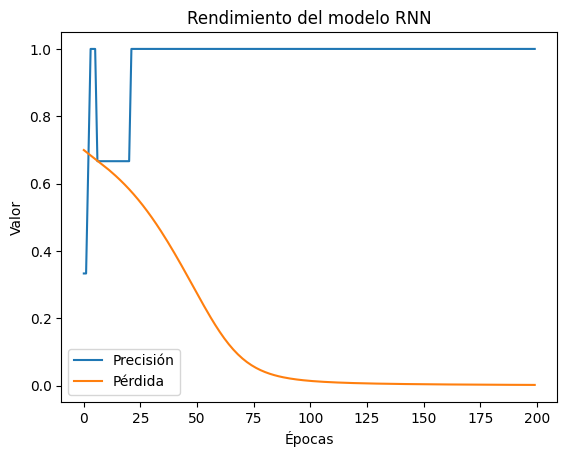

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

# Función de limpieza de texto simple
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    # Eliminar palabras de longitud 1, 2, para evitar eliminar palabras útiles
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Evitar eliminar palabras útiles
    return text

# Verifica si hay valores nulos o vacíos en la columna 'Comentarios'
Baseinicial_Consolidada = pd.DataFrame({
    'Comentarios': ["el gato juega", "el perro corre", "la luna brilla"]
})  # Ejemplo de DataFrame, reemplázalo con tus datos reales

if Baseinicial_Consolidada['Comentarios'].isnull().sum() > 0:
    print("Hay valores nulos en 'Comentarios', se eliminarán o reemplazarán.")
    Baseinicial_Consolidada['Comentarios'].fillna('', inplace=True)  # Rellenar los nulos

# Aplicar la función de limpieza a la columna de texto
Baseinicial_Consolidada['Observaciones_Limpias'] = Baseinicial_Consolidada['Comentarios'].apply(clean_text)
 
# Usar Tokenizer para convertir las palabras en secuencias de enteros
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Baseinicial_Consolidada['Observaciones_Limpias'])

# Ver el diccionario 'word_index' que asigna un índice único a cada palabra
print("Diccionario word_index:")
print(tokenizer.word_index)

# Convertir las observaciones limpias en secuencias de índices
sequences = tokenizer.texts_to_sequences(Baseinicial_Consolidada['Observaciones_Limpias'])

# Rellenar las secuencias para que todas tengan la misma longitud
max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len)

# Dividir en características (X) y etiquetas (y) - En este caso, solo usaremos X
X = sequences  # Las características de entrada son las secuencias de índices

# Crear el modelo RNN
model_rnn = Sequential([
    # Agregar una capa de Embedding para representar las palabras como vectores densos
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_sequence_len),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')  # Asumimos que es una tarea de clasificación binaria
])

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_rnn.summary()

# Suponiendo que tienes una variable 'y' (que puede ser la clasificación de las observaciones)
y = np.random.randint(0, 2, size=X.shape[0])  # Etiquetas ficticias para la demostración

# Entrenar el modelo
history_rnn = model_rnn.fit(X, y, epochs=200, verbose=1)

# Graficar la precisión y la pérdida durante el entrenamiento
plt.plot(history_rnn.history['accuracy'], label='Precisión')
plt.plot(history_rnn.history['loss'], label='Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Rendimiento del modelo RNN')
plt.legend()
plt.show()



In [84]:
# Modificar el modelo para predecir la siguiente palabra
model_rnn = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_sequence_len),
    SimpleRNN(32),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')  # Cambiar a softmax para predicción de palabras
])

# Compilar el modelo para clasificación de múltiples clases
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_rnn.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Crear una función para predecir la siguiente palabra
def predict_next_word(sentence):
    # Tokenizar la oración
    sequence = tokenizer.texts_to_sequences([sentence])[0]
    # Paddear la secuencia (hacerla del tamaño correcto)
    sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=max_sequence_len-1)
    
    # Predecir la siguiente palabra usando el modelo entrenado
    prediction = model_rnn.predict(sequence)
    
    # Obtener el índice de la palabra predicha
    predicted_index = np.argmax(prediction)
    
    # Obtener la palabra a partir del índice
    predicted_word = tokenizer.index_word.get(predicted_index, "<UNKNOWN>")  # Si no existe en el diccionario, devuelve <UNKNOWN>
    
    return predicted_word

# Probar la función
predicted_word = predict_next_word('el gato')
print(f'La siguiente palabra predicha es: {predicted_word}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
La siguiente palabra predicha es: corre


In [87]:
# Secuencias más largas
long_sentences = ["el gato juega en el jardín mientras el sol brilla", "la luna llena ilumina el cielo nocturno"]
long_sequences = tokenizer.texts_to_sequences(long_sentences)
long_sequences = tf.keras.preprocessing.sequence.pad_sequences(long_sequences, maxlen=max_sequence_len)

# Predicciones del modelo para la siguiente palabra de cada secuencia
predictions = model_rnn.predict(long_sequences)

# Obtener el índice de la palabra predicha para cada secuencia
predicted_indices = [np.argmax(pred) for pred in predictions]

# Convertir los índices predichos a palabras, omitiendo el índice 0 (padding)
predicted_words_text = [tokenizer.index_word.get(idx, "<UNKNOWN>") for idx in predicted_indices if idx != 0]

print(f"Secuencias de entrada: {long_sentences}")
print(f"Palabras predichas: {predicted_words_text}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Secuencias de entrada: ['el gato juega en el jardín mientras el sol brilla', 'la luna llena ilumina el cielo nocturno']
Palabras predichas: ['perro']


Procesamiento de Secuencias con LSTM

In [89]:
# Dividir en características (X) y etiquetas (y)
X, y = sequences[:, :-1], sequences[:, -1]

# Aplicar one-hot encoding a las etiquetas (y)
y = tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index)+1)

# Crear el modelo LSTM
model_lstm = Sequential([
    # Capa de Embedding
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_sequence_len-1),
    # Capa LSTM
    LSTM(64),
    # Capa densa con softmax para clasificación de varias clases
    Dense(len(tokenizer.word_index)+1, activation='softmax')
])

# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_lstm.summary()

# Entrenamiento del modelo LSTM
model_lstm.fit(X, y, epochs=5, batch_size=32)

model_lstm.fit(X, y, epochs=5, batch_size=32)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 1.9463
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3333 - loss: 1.9438
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6667 - loss: 1.9413
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 1.9389
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 1.9364
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 1.9339
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 1.9314
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 1.9288
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 1.9262
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 1.9236


In [90]:

# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_lstm.summary()

# Entrenar el modelo LSTM con 300 épocas
history_lstm = model_lstm.fit(X, y, epochs=300, verbose=1)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 1, 8)           │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,199 (75.00 KB)

 Trainable params: 19,199 (75.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 1.9210
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 1.9183
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.9155
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 1.9127
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 1.0000 - loss: 1.9098
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 1.9069
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 1.9040
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 1.9010
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 1.8979
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 1.8947
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 1.8915
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss

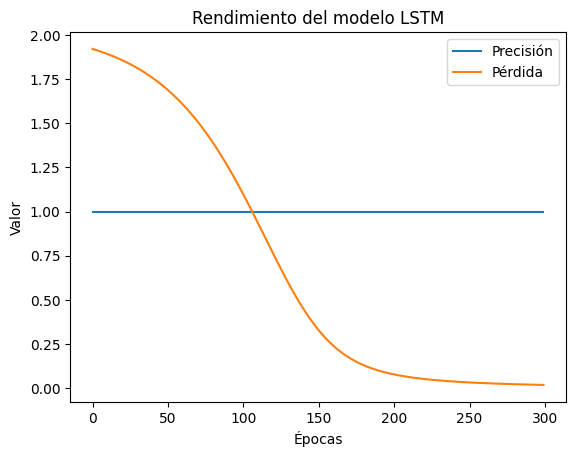

In [93]:
# Graficar la precisión y la pérdida
plt.plot(history_lstm.history['accuracy'], label='Precisión')
plt.plot(history_lstm.history['loss'], label='Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Rendimiento del modelo LSTM')
plt.legend()
plt.show()


In [94]:
# Función para generar texto basado en el modelo LSTM entrenado
def generar_texto_lstm(model, tokenizer, seed_text, max_sequence_len, n_words):
    for _ in range(n_words):
        # Convertir el texto semilla a secuencia de enteros
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        # Rellenar la secuencia para que tenga la longitud correcta
        token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        # Predecir la siguiente palabra usando el modelo
        predicted = np.argmax(model.predict(token_list), axis=-1)
        
        # Convertir el índice predicho a la palabra correspondiente
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        # Añadir la palabra generada al texto semilla
        seed_text += " " + output_word
    return seed_text

# Generar texto basado en un texto inicial
seed_text = "el gato"
generated_text = generar_texto_lstm(model_lstm, tokenizer, seed_text, max_sequence_len, 5)

# Imprimir el texto generado
print("Texto generado: ", generated_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Texto generado:  el gato juega brilla brilla brilla brilla
